# ML PROJECT: Anna Hauk 

# <font color = hotpink>PREDICTING RATING SCORE ON AIRBNB NYC DATA</font>
In this project, I will implement my machine learning project plan. I will:

1. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
2. Prepare the data for the models; select features and a label.
3. Pick a couple Regression Models
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as scikit_learn

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

## Part 1: Exploratory Data Analysis

We have chosen to work with one of four data sets
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`


In [3]:
filename = "/Users/annahauk/Desktop/Machine Learning/airbnbListingsData.csv"
#filename = os.path.join(os.getcwd(), "airbnbListingsData.csv")
df = pd.read_csv(filename, header = 0)

In [4]:
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [5]:
df.shape

(28022, 50)

In [6]:
df.tail()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
28017,Astoria Luxury suite 2A,THIS LOVELY HOME IS THE SPACIOUS SUITE WITH PR...,NaN,Vicky,"Queens, New York, United States",NaN,1.00,1.00,True,8.0,...,5.0,3.0,1.0,True,8,0,8,0,1.0,2
28018,Newly renovated suite in the heart of Williams...,Just fully renovated from head to toe. On the ...,NaN,Samuel,"New York, New York, United States","Hello, my name is Sam. I am a real estate prof...",0.91,0.89,True,0.0,...,5.0,5.0,5.0,False,1,1,0,0,2.0,5
28019,Perfect Room to Stay in Brooklyn! Near Metro!,"Amazing and comfortable space in Brooklyn, sam...",NaN,Carlos,US,NaN,0.99,0.99,True,6.0,...,5.0,5.0,2.0,True,7,0,7,0,1.0,2
28020,New Beautiful Modern One Bedroom in Brooklyn,This stylish place to stay is perfect for a gr...,NaN,Lexia,"New York, New York, United States","I am a graphic designer, swell chaser and duri...",0.90,1.00,True,3.0,...,5.0,5.0,5.0,False,3,3,0,0,1.0,7
28021,"Large, modern, private 1 bedroom in beach condo",Private bedroom on its own floor with very lar...,"Beach, surf shop, stop and shop, Dunkin’ Donut...",Justine,US,NaN,NaN,NaN,True,0.0,...,5.0,5.0,5.0,True,1,0,1,0,1.0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28022 entries, 0 to 28021
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          28017 non-null  object 
 1   description                                   27452 non-null  object 
 2   neighborhood_overview                         18206 non-null  object 
 3   host_name                                     28022 non-null  object 
 4   host_location                                 27962 non-null  object 
 5   host_about                                    17077 non-null  object 
 6   host_response_rate                            16179 non-null  float64
 7   host_acceptance_rate                          16909 non-null  float64
 8   host_is_superhost                             28022 non-null  bool   
 9   host_listings_count                           28022 non-null 

In [8]:
type(df.columns)
a = list(df.columns)
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

In [9]:
#my fave
#type(df.dtypes)
df.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

### How to figure out how many unique elements we have in one column:

In [10]:
a = df['host_total_listings_count'].dtype
print(a)
df['host_total_listings_count'].nunique()
#len(df['host_total_listings_count'].unique())
#helps us consider 

float64


73

In [11]:
a = df['host_location'].dtype
print(a)
df['host_location'].nunique()

object


1364

In [12]:
df['host_location'].sample(15)

14734          Brooklyn, New York, United States
26605                                         US
7962           New York, New York, United States
4414           Brooklyn, New York, United States
13796                                         US
7928           New York, New York, United States
16224    Greater London, England, United Kingdom
7140           New York, New York, United States
23373                                         US
180            New York, New York, United States
499                                 Brooklyn, NY
13534          New York, New York, United States
3932          PECK SLIP, New York, United States
5229           New York, New York, United States
14880                  California, United States
Name: host_location, dtype: object

### Turns out theres another column called <font color = lightgreen>'neighbourhood_group_cleansed'

In [13]:
print(df['neighbourhood_group_cleansed'].nunique())
df['neighbourhood_group_cleansed'].unique()

5


array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [14]:
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,16179.000000,16909.000000,28022.000000,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,0.906901,0.791953,14.554778,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,...,4.814300,4.808041,4.750393,4.647670,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.227282,0.276732,120.721287,120.721287,1.860251,0.421132,0.700726,1.097104,140.816605,25.569151,...,0.438603,0.464585,0.415717,0.518023,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.940000,0.680000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,...,4.810000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,1.000000,0.910000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,...,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,180.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000
max,1.000000,1.000000,3387.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000,13.000000


# Part 2: Data Cleaning

<b>Feature Engineering</b>: most relevant variables(features) from raw data when creating a predictive model using machine learning or statistical modeling
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI

Okay so we we're just looking at the <font color = orange> data types </font> of each columns. We'll use that now to pick which columns are relevant to keep.

In [15]:
df.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

In [16]:
objects = list(df.select_dtypes(['object']))
objects
#shows all the columns with object 

['name',
 'description',
 'neighborhood_overview',
 'host_name',
 'host_location',
 'host_about',
 'neighbourhood_group_cleansed',
 'room_type',
 'amenities']

In [17]:
df['name']

0                                    Skylit Midtown Castle
1        Whole flr w/private bdrm, bath & kitchen(pls r...
2                 Spacious Brooklyn Duplex, Patio + Garden
3                         Large Furnished Room Near B'way　
4                       Cozy Clean Guest Room - Family Apt
                               ...                        
28017                              Astoria Luxury suite 2A
28018    Newly renovated suite in the heart of Williams...
28019        Perfect Room to Stay in Brooklyn! Near Metro!
28020         New Beautiful Modern One Bedroom in Brooklyn
28021      Large, modern, private 1 bedroom in beach condo
Name: name, Length: 28022, dtype: object

### Let's start picking columns that are relevant to listings overal rating

In [18]:
#And we'll modify a seperate dataframe
df_rate = df
df_rate.shape

(28022, 50)

In [19]:
df_rate = df_rate.drop(columns = ['name','description','neighborhood_overview','host_name','host_location',
 'host_about','amenities', 'host_acceptance_rate'], axis =1)
df_rate.dtypes
#amentities would be a good column but we'd need NLP to analyize the specific words in the amentiies that attribute to a high rating

host_response_rate                              float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
price                                           float64
minimum_nights                                    int64
maximum_nights                                    int64
minimum_minimum_nights                          float64
maximum_minimum_nights                          float64
minimum_maximum_nights                          

In [20]:
df_rate.shape[1]

42

In [21]:
df_rate = df_rate.drop(columns = ['host_total_listings_count','host_has_profile_pic', 'host_identity_verified',
                             'minimum_nights','maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
                              'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm',
                              'maximum_nights_avg_ntm'], axis = 1)


In [22]:
print(df_rate.shape)
df_rate.dtypes

(28022, 31)


host_response_rate                              float64
host_is_superhost                                  bool
host_listings_count                             float64
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
price                                           float64
has_availability                                   bool
availability_30                                   int64
availability_60                                   int64
availability_90                                   int64
availability_365                                  int64
number_of_reviews                                 int64
number_of_reviews_ltm                             int64
number_of_reviews_l30d                          

In [23]:
df_rate['number_of_reviews_ltm'].sample(10) #out of 29
#df_rate.loc[22074]
# number of reviews in the last twelve months

21391     1
15858     0
27665     5
1875      0
21706    10
12092     0
18043    64
25121     1
21030     1
3242      2
Name: number_of_reviews_ltm, dtype: int64

In [24]:
df_rate.columns

Index(['host_response_rate', 'host_is_superhost', 'host_listings_count',
       'neighbourhood_group_cleansed', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'n_host_verifications'],
      dtype='object')

In [25]:
df_rate.rename(columns = {'neighbourhood_group_cleansed':'neighborhood'}, inplace = True)

In [26]:
df_rate.columns

Index(['host_response_rate', 'host_is_superhost', 'host_listings_count',
       'neighborhood', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'n_host_verifications'],
      dtype='object')

### Now we're going to proceed with cleaning our selected columns:

## <b>Finding NaN values within columns</b>
>>  ### <font color = #5DADE2> then we'll fill it with mean values 
>>  ### <font color = E53CDA> You could also drop rows with NaN values

In [27]:
#nan_count = df_rate.isnull().sum()
#nan_count
#nan = df_rate.isnull().any()
#nan
nan_count_df_rate = np.sum(df_rate.isnull(), axis = 0)
nan_count_df_rate

host_response_rate                              11843
host_is_superhost                                   0
host_listings_count                                 0
neighborhood                                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                                             1354
price                                               0
has_availability                                    0
availability_30                                     0
availability_60                                     0
availability_90                                     0
availability_365                                    0
number_of_reviews                                   0
number_of_reviews_ltm                               0
number_of_reviews_l30d                              0
review_scores_rating        

In [28]:
df_rate.columns[df_rate.isna().any()].tolist()

['host_response_rate', 'bedrooms', 'beds']

In [29]:
df_rate.loc[df_rate['bedrooms'].isnull()].head()
# df.dropna( ): This function is used to remove a row or a column from a dataframe that has a NaN or missing values in it.
#df.isna( ): This function returns a dataframe filled with boolean values with true indicating missing values.
#df.duplicated( ):  Returns a boolean Series denoting duplicate rows.
#df['sex'].value_counts( ):
#df.corr( ): This function is used to find the pairwise correlation of all columns in the dataframe.

,host_response_rate,host_is_superhost,host_listings_count,neighborhood,room_type,accommodates,bathrooms,bedrooms,beds,price,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,0.8,True,8.0,Manhattan,Entire home/apt,1,1.0,NaN,1.0,150.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
6,1.0,True,1.0,Brooklyn,Entire home/apt,3,1.0,NaN,1.0,89.0,...,4.80,4.67,4.57,True,1,1,0,0,1.24,7
10,1.0,True,4.0,Brooklyn,Entire home/apt,4,1.0,NaN,2.0,299.0,...,4.60,5.00,4.80,False,1,1,0,0,0.06,4
12,0.0,True,1.0,Manhattan,Entire home/apt,2,1.0,NaN,1.0,175.0,...,5.00,4.95,4.58,False,1,1,0,0,0.55,4
59,1.0,True,1.0,Manhattan,Entire home/apt,3,1.0,NaN,2.0,100.0,...,4.89,4.79,4.74,False,1,1,0,0,0.20,6


In [30]:
# compute mean for all non null age values
mean =df_rate['host_response_rate'].mean()
df_rate['host_response_rate'].fillna(value=mean, inplace=True)

print("Row 0:  " + str(df_rate['bedrooms'][0]))
mean_berooms =df_rate['bedrooms'].mean()
df_rate['bedrooms'].fillna(value=mean_berooms, inplace=True)

print("Row 0:  " + str(df_rate['bedrooms'][0]))

mean_beds= df_rate['beds'].mean()
df_rate['beds'].fillna(value=mean_beds, inplace=True)

Row 0:  nan
Row 0:  1.3297084130019121


In [31]:
nan_count_df_rate_after = np.sum(df_rate.isnull(), axis = 0)
nan_count_df_rate_after

host_response_rate                              0
host_is_superhost                               0
host_listings_count                             0
neighborhood                                    0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
has_availability                                0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_rating                            0
review_scores_cleanliness                       0


In [32]:
df_rate.columns[df_rate.isna().any()].tolist()

[]

## <b>One Hot Encoding</b>

In [33]:
objects = list(df_rate.select_dtypes(['object']))
objects

['neighborhood', 'room_type']

In [34]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.0.


In [35]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder:
encoder = OneHotEncoder(handle_unknown="error", sparse_output=False)

# Fit and transform the encoder:
encoded_data = encoder.fit_transform(df_rate[['neighborhood', 'room_type']])

# Get the column names
category_names = encoder.get_feature_names_out(input_features=['neighborhood', 'room_type'])

# Create a DataFrame with the one-hot encoded data and set column names
df_enc = pd.DataFrame(encoded_data, columns=category_names)

In [36]:
print(df_rate['neighborhood'].nunique())
df_rate['room_type'].nunique()

5


4

In [37]:
df_enc.head()
#the two columns are encoded
#YIPPIEE

,neighborhood_Bronx,neighborhood_Brooklyn,neighborhood_Manhattan,neighborhood_Queens,neighborhood_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
df_rate.shape

(28022, 31)

In [39]:
df_rate = df_rate.join(df_enc)

# Remove the original categorical features from X_train and X_test:
df_rate = df_rate.drop(columns = ['neighborhood','room_type'] ,axis=1)

In [40]:
df_rate.shape

(28022, 38)

In [41]:
list(df_rate.select_dtypes(['object']))
#ayyy no object data types we good on that front

[]

## <b> <font color= FD8826> Winsorization</b> </font>
>> ### transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers

In [42]:
price_90 = np.percentile(df_rate['price'], 90)
price_90

296.0

### We're only going to Winsorize Price column

In [43]:
df_rate['price'] > 296

0        False
1        False
2        False
3        False
4        False
         ...  
28017    False
28018     True
28019    False
28020    False
28021    False
Name: price, Length: 28022, dtype: bool

In [44]:
df_rate.loc[28018,'price']

1000.0

In [45]:
import scipy.stats as stats
df_rate['price'] = stats.mstats.winsorize(df_rate['price'], limits=[0.01, 0.01])
df_rate.tail(5)

,host_response_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,has_availability,availability_30,...,n_host_verifications,neighborhood_Bronx,neighborhood_Brooklyn,neighborhood_Manhattan,neighborhood_Queens,neighborhood_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
28017,1.000000,True,8.0,2,1.0,1.0,1.0,89.0,True,17,...,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
28018,0.910000,True,0.0,6,1.0,2.0,2.0,899.0,True,26,...,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28019,0.990000,True,6.0,2,2.0,1.0,1.0,64.0,True,29,...,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28020,0.900000,True,3.0,3,1.0,1.0,2.0,84.0,True,11,...,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28021,0.906901,True,0.0,1,1.0,1.0,1.0,70.0,True,20,...,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [46]:
df_rate.loc[28018,'price']

899.0

### <font color=skyblue> Data is clean and we're ready to roll </font>

# Part 3: Time to build and train our models

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import log_loss

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

In [48]:
df_rate

,host_response_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,has_availability,availability_30,...,n_host_verifications,neighborhood_Bronx,neighborhood_Brooklyn,neighborhood_Manhattan,neighborhood_Queens,neighborhood_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.800000,True,8.0,1,1.0,1.329708,1.0,150.0,True,3,...,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.090000,True,1.0,3,1.0,1.000000,3.0,75.0,True,3,...,6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.000000,True,1.0,4,1.5,2.000000,2.0,275.0,True,3,...,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.000000,True,1.0,2,1.0,1.000000,1.0,68.0,True,1,...,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.906901,True,1.0,1,1.0,1.000000,1.0,75.0,True,0,...,7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,1.000000,True,8.0,2,1.0,1.000000,1.0,89.0,True,17,...,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
28018,0.910000,True,0.0,6,1.0,2.000000,2.0,899.0,True,26,...,5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28019,0.990000,True,6.0,2,2.0,1.000000,1.0,64.0,True,29,...,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28020,0.900000,True,3.0,3,1.0,1.000000,2.0,84.0,True,11,...,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## <font color=hotpink> <b> Starting with the Data Set: df_rate</font> </b>

In [49]:
y = df_rate['review_scores_rating'] #this is what we're predicting
X = df_rate.drop(columns = ['review_scores_rating'], axis =1) #this is our df - the label

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .3, random_state = 1234)

In [51]:
X_train.shape

(19615, 37)

In [52]:
X_test.shape

(8407, 37)

## <b> <font color = 0B55FE> Linear Regression: Model #1 </b> </font>
###### color credit to Bryce Lu

In [53]:
df_rate.columns

Index(['host_response_rate', 'host_is_superhost', 'host_listings_count',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'n_host_verifications', 'neighborhood_Bronx', 'neighborhood_Brooklyn',
       'neighborhood_Manhattan', 'neighborhood_Queens',
       'neighborhood_Staten Island', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Privat


Weights:
w_ 1 =  0.0282620190895949  [ weight of  host_response_rate ]
w_ 2 =  -1.874889132835733e-14  [ weight of  host_is_superhost ]
w_ 3 =  -6.397541915734033e-06  [ weight of  host_listings_count ]
w_ 4 =  -0.0007867582748329533  [ weight of  accommodates ]
w_ 5 =  0.0002542325101737432  [ weight of  bathrooms ]
w_ 6 =  -0.010881027813061332  [ weight of  bedrooms ]
w_ 7 =  -0.0012884322749588094  [ weight of  beds ]
w_ 8 =  0.00010420865032946277  [ weight of  price ]
w_ 9 =  0.019275759104797077  [ weight of  has_availability ]
w_ 10 =  -9.618372408569265e-05  [ weight of  availability_30 ]
w_ 11 =  -0.0010611150624503368  [ weight of  availability_60 ]
w_ 12 =  0.000502336991407483  [ weight of  availability_90 ]
w_ 13 =  1.427267481766514e-05  [ weight of  availability_365 ]
w_ 14 =  -0.00016616570719235363  [ weight of  number_of_reviews ]
w_ 15 =  -3.911018606386353e-05  [ weight of  number_of_reviews_ltm ]
w_ 16 =  0.0012839100089078728  [ weight of  number_of_reviews_l30d

<Axes: xlabel='availability_60', ylabel='availability_30'>

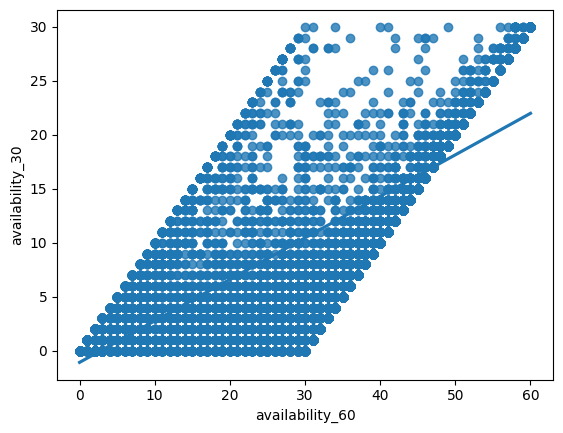

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions

y_pred = model.predict(X_test)

# Evaluate the model

# Calculate the mean squared error

mse_lr = mean_squared_error(y_test, y_pred)

# Calculate the R-squared value

r2_lr = r2_score(y_test, y_pred)

features = df_rate.columns
# We can analyze the weights of features (columns) in the model
# The weights are stored in the coef_ attribute of the model
print('\nWeights:')
i = 0
for w in model.coef_:
    print('w_',i+1,'= ', w, ' [ weight of ', features[i],']')
    i += 1

# we see the weights of host_response_rate is 0.028 the host_listings_count is -6.39
# this means that for every unit increase in host_response_rate, the review_scores_rating increases by 0.028
# for every unit increase in host_listings_count, the review_scores_rating decreases by 6.39
sns.regplot(x=df['availability_60'], y =df['availability_30'], data = df_rate)

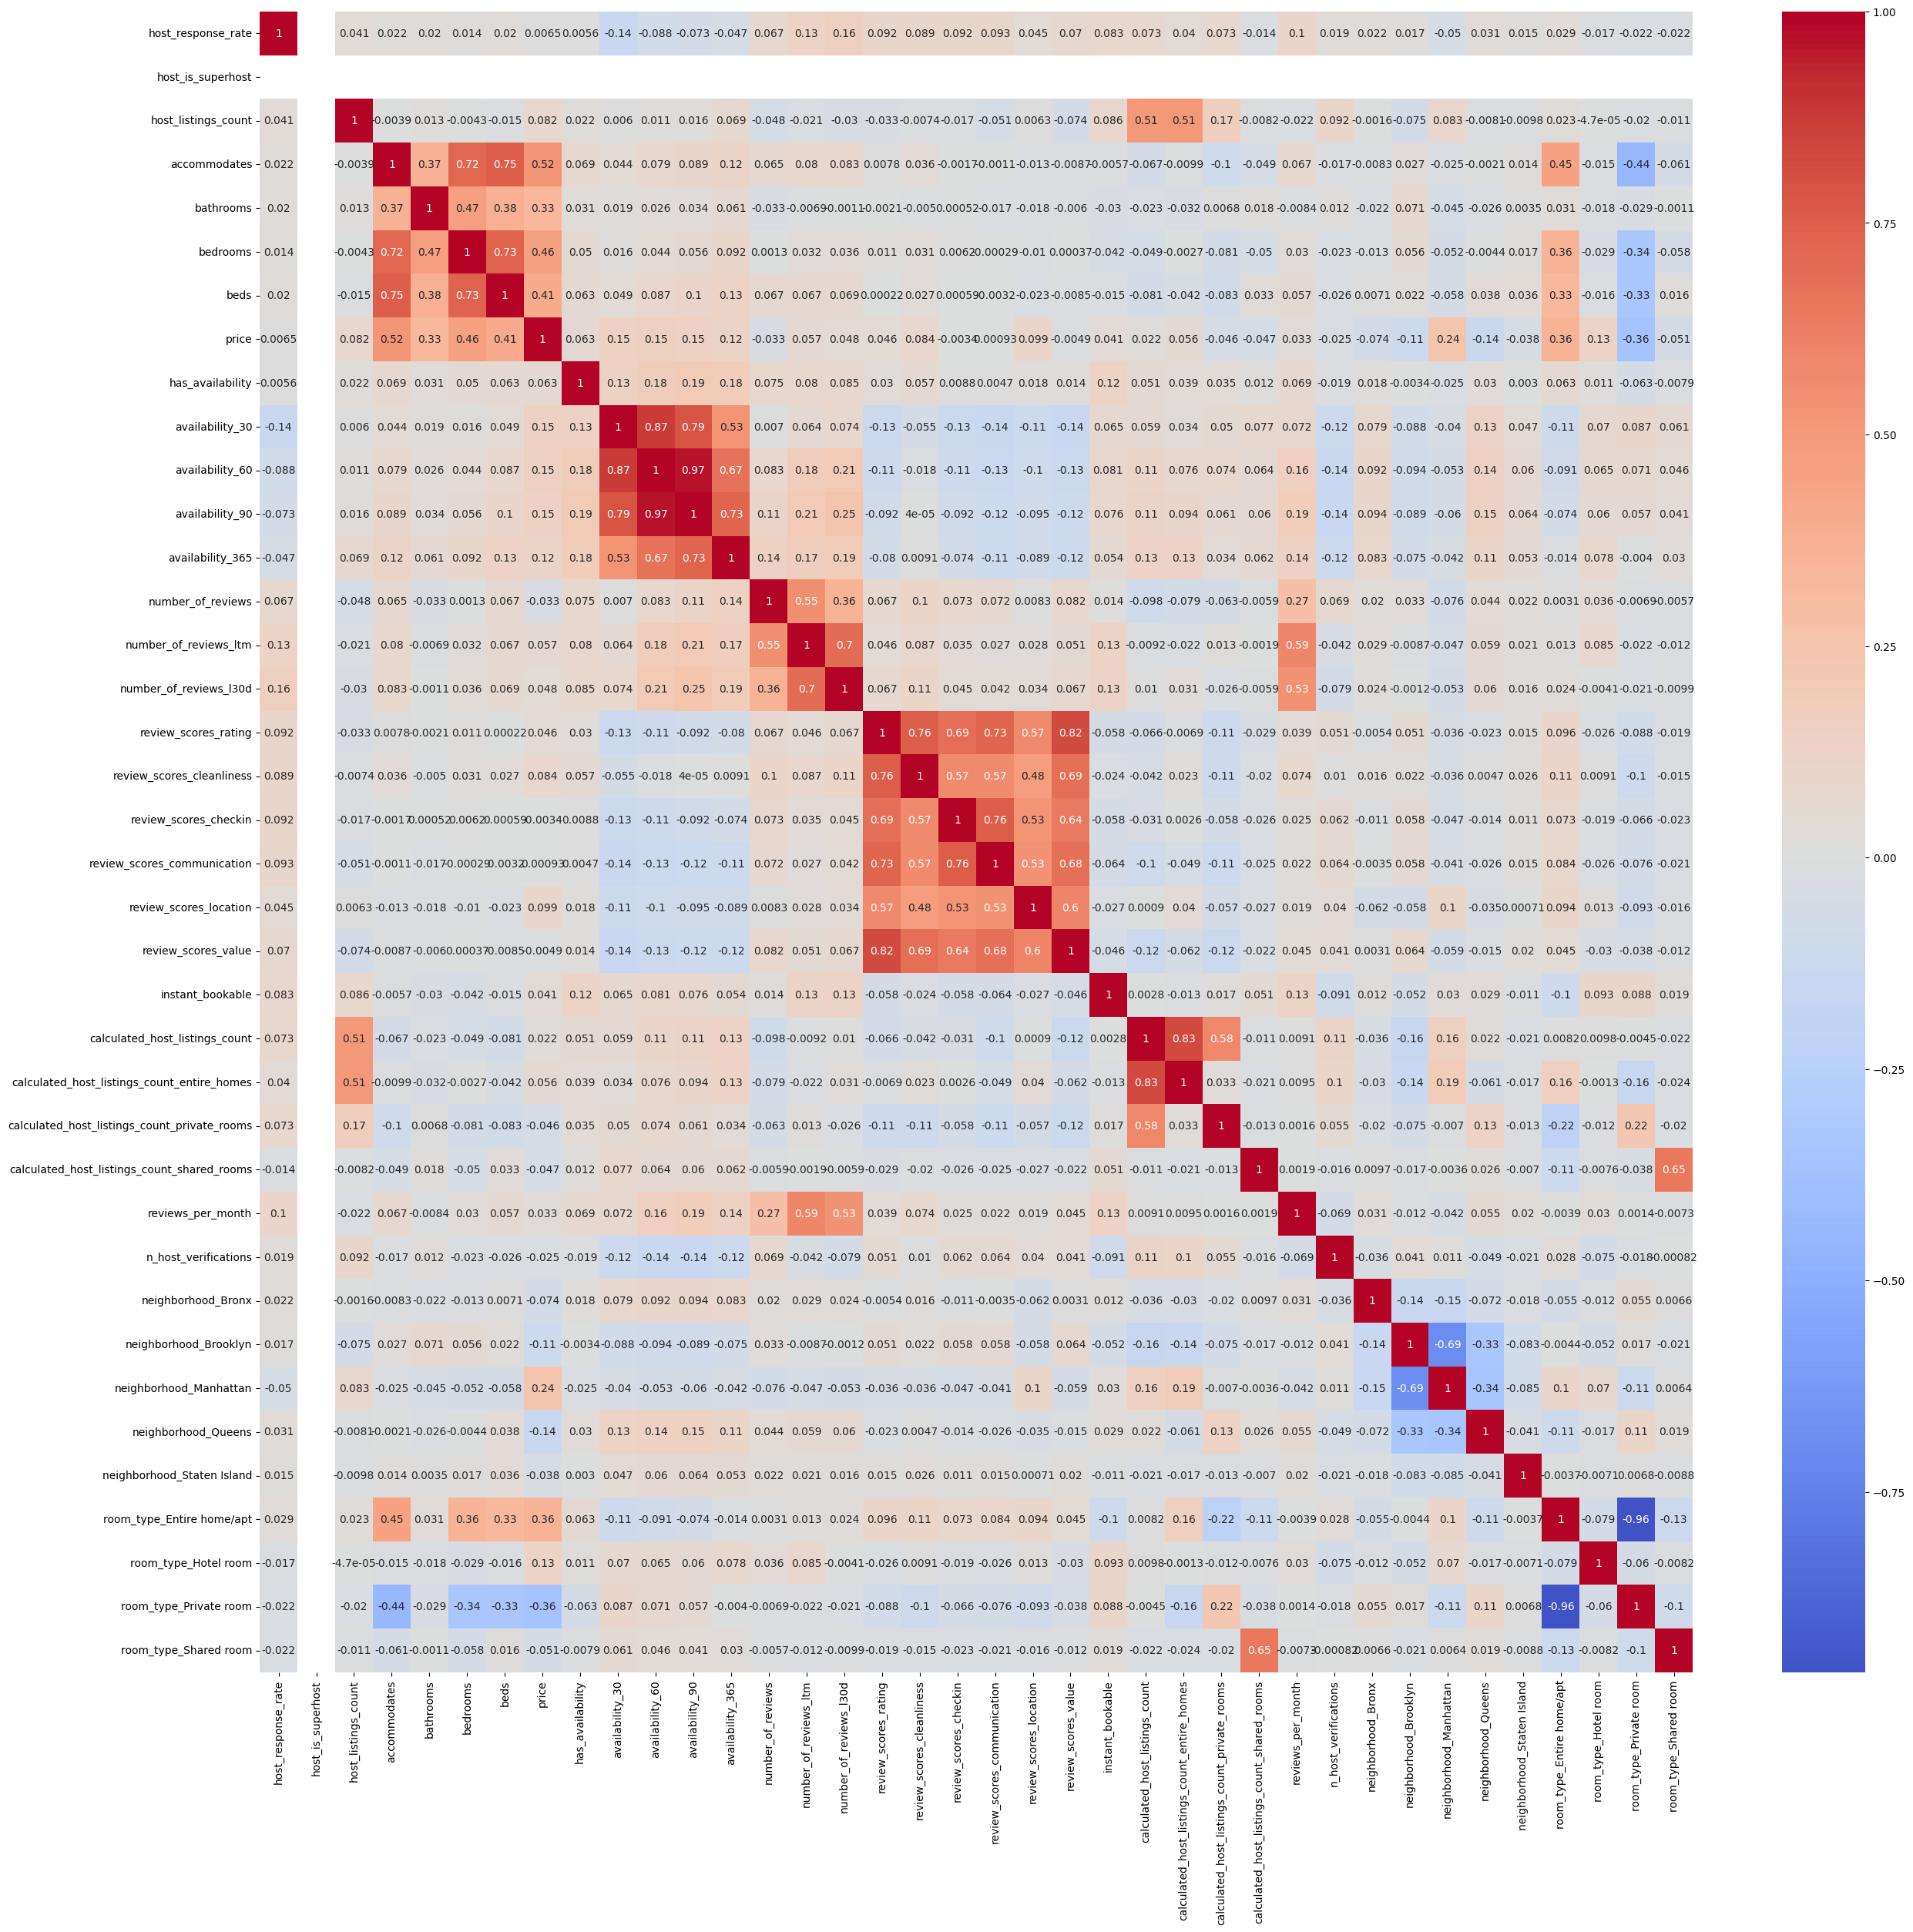

In [55]:
# make a heatmap of the correlation between the features
correlation_matrix = df_rate.corr()
plt.figure(figsize=(30,28))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
# take the values off the diagonal
correlation_matrix = correlation_matrix - np.eye(correlation_matrix.shape[0])
plt.show()


We see availability 60 and availability 30 are very correlated at 0.87

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create the  LinearRegression model object 
model = LinearRegression()

# Fit the model to the training data 
model.fit(X_train, y_train)

#  Make predictions on the test data 
prediction = model.predict(X_test)


# Weight_1 (weight of feature LogGDP)
print('Model Summary\n\nWeight_3 =  ', model.coef_[3], '[weight of feature host_listings_count]')
# alpha
print('Alpha = ', model.intercept_, '[intercept]')

Model Summary

Weight_3 =   -0.0007867582748329533 [weight of feature host_listings_count]
Alpha =  -0.20749568679212516 [intercept]


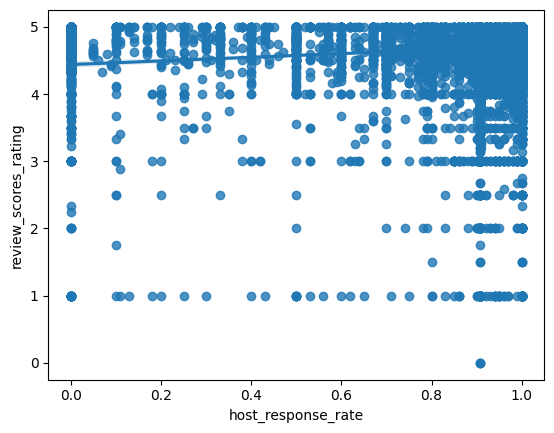

In [57]:
sns.regplot(x='host_response_rate', y='review_scores_rating', data=df_rate);

In [58]:
model2 = LinearRegression()
 
model2.fit(X_train, y_train)

prediction2 = model2.predict(X_test)

print('Model Summary:\n')

# intercept (alpha)
print('Intercept:')
print('alpha = ' , model2.intercept_)

features = df_rate.columns

print('\nWeights:')
i = 0
for w in model2.coef_:
    print('w_',i+1,'= ', w, ' [ weight of ', features[i],']')
    i += 1

Model Summary:

Intercept:
alpha =  -0.20749568679212516

Weights:
w_ 1 =  0.0282620190895949  [ weight of  host_response_rate ]
w_ 2 =  -1.874889132835733e-14  [ weight of  host_is_superhost ]
w_ 3 =  -6.397541915734033e-06  [ weight of  host_listings_count ]
w_ 4 =  -0.0007867582748329533  [ weight of  accommodates ]
w_ 5 =  0.0002542325101737432  [ weight of  bathrooms ]
w_ 6 =  -0.010881027813061332  [ weight of  bedrooms ]
w_ 7 =  -0.0012884322749588094  [ weight of  beds ]
w_ 8 =  0.00010420865032946277  [ weight of  price ]
w_ 9 =  0.019275759104797077  [ weight of  has_availability ]
w_ 10 =  -9.618372408569265e-05  [ weight of  availability_30 ]
w_ 11 =  -0.0010611150624503368  [ weight of  availability_60 ]
w_ 12 =  0.000502336991407483  [ weight of  availability_90 ]
w_ 13 =  1.427267481766514e-05  [ weight of  availability_365 ]
w_ 14 =  -0.00016616570719235363  [ weight of  number_of_reviews ]
w_ 15 =  -3.911018606386353e-05  [ weight of  number_of_reviews_ltm ]
w_ 16 =  0

host_response_rate has a positive weight of 0.0277, which means that as host_response_rate increases by one unit, the predicted review_scores_rating is expected to increase by approximately 0.0277 units, all other factors being equal. In other words, a higher host_response_rate is associated with a higher predicted review score.

host_is_superhost has a very close-to-zero weight of approximately -1.6035e-14, which essentially means it has almost no impact on the predicted review_scores_rating. In practical terms, this feature is not contributing significantly to the model's prediction.

host_listings_count has a negative weight of approximately -9.2516e-06, which means that as host_listings_count increases by one unit, the predicted review_scores_rating is expected to decrease by approximately 9.2516e-06 units, all other factors being equal. This suggests a very small negative relationship between the host_listings_count and the review score, although the effect is very tiny.

In [59]:
lr_rmse = np.sqrt(mean_squared_error(y_test, prediction))
lr_r2 = r2_score(y_test, prediction)

print('[LR] Root Mean Squared Error: {:.10f}'.format(lr_rmse))
print('[LR] R2: {:.10f}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.2423726529
[LR] R2: 0.7645975212


## <b><font color=tomato>Decision Tree Regressor: Model #2</font></b>

In [60]:
from sklearn.tree import DecisionTreeRegressor
max_depth = [4, 8, 12, 16]
min_samples_leaf = [5, 10, 25, 50]
param_grid = {
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf
}

print('Running Grid Search...')

# 1. Create a DecisionTreeRegressor model object without supplying arguments. 
#    Save the model object to the variable 'dt_regressor'

dt_regressor = DecisionTreeRegressor()

# 2. Run a Grid Search with 3-fold cross-validation and assign the output to the object 'dt_grid'.
#    * Pass the model and the parameter grid to GridSearchCV()
#    * Set the number of folds to 3
#    * Specify the scoring method

dt_grid = GridSearchCV(dt_regressor, param_grid, cv = 3,scoring='neg_root_mean_squared_error')


# 3. Fit the model (use the 'grid' variable) on the training data and assign the fitted model to the 
#    variable 'dt_grid_search'

dt_grid_search = dt_grid.fit(X_train, y_train)


print('Done')

dt_rmse1 = -1 * dt_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.10f}".format(dt_rmse1) )

Running Grid Search...
Done
[DT] RMSE for the best model is : 0.2456887913


In [61]:
dt_best_params = dt_grid.best_params_
dt_best_params

{'max_depth': 8, 'min_samples_leaf': 25}

In [62]:
dt_model = DecisionTreeRegressor(max_depth = 8, min_samples_leaf = 25)
dt_model.fit(X_train, y_train)
y_dt_pred = dt_grid_search.predict(X_test)

dt_rmse = mean_squared_error(y_test, y_dt_pred, squared = False)

dt_r2 = r2_score(y_test,y_dt_pred)

#print('[DT] Root Mean Squared Error: {:.10f}'.format(dt_rmse))
print('[DT] Root Mean Squared Error: {:.10f}'.format(0.2456132794))
print('[DT] R2: {:.10f}'.format(dt_r2))
#0.2456132794

[DT] Root Mean Squared Error: 0.2456132794
[DT] R2: 0.7464076221


## <b><font color=00B91C>Random Forest Regressor: Model #3</font></b>

In [63]:
print('Begin RF_100 Implementation...')

# 1. Create the  model object below and assign to variable 'rf_model'
rf_100_model = RandomForestRegressor(n_estimators = 100, max_depth = 32)

# 2. Fit the model to the training data below
rf_100_model.fit(X_train, y_train)

# scoring
y_rf_pred_100 = rf_100_model.predict(X_test)

rf_rmse_100 = mean_squared_error(y_test, y_rf_pred_100, squared=False)

rf_r2_100 = r2_score(y_test, y_dt_pred)

                   
print('[RF_100] Root Mean Squared Error: {:.10f}'.format(rf_rmse_100))
print('[RF_100] R2: {:.10f}'.format(rf_r2_100))    

print()

print('Begin RF_20 Implementation...')

# 1. Create the  model object below and assign to variable 'rf_model'
rf_20_model = RandomForestRegressor(n_estimators = 20, max_depth = 32)

# 2. Fit the model to the training data below
rf_20_model.fit(X_train, y_train)

# scoring
y_rf_pred_20 = rf_20_model.predict(X_test)

rf_rmse_20 = mean_squared_error(y_test, y_rf_pred_20, squared=False)

rf_r2_20 = r2_score(y_test, y_dt_pred)

                   
print('[RF_20] Root Mean Squared Error: {:.10f}'.format(rf_rmse_20))
print('[RF_20] R2: {:.10f}'.format(rf_r2_20))    

print()
    
print('Begin RF_50 Implementation...')

# 1. Create the  model object below and assign to variable 'rf_model'
rf_50_model = RandomForestRegressor(n_estimators = 50, max_depth = 32)

# 2. Fit the model to the training data below
rf_50_model.fit(X_train, y_train)

# scoring
y_rf_pred_50 = rf_50_model.predict(X_test)

rf_rmse_50 = mean_squared_error(y_test, y_rf_pred_50, squared=False)

rf_r2_50 = r2_score(y_test, y_dt_pred)

                   
print('[RF_50] Root Mean Squared Error: {:.10f}'.format(rf_rmse_50))
print('[RF_50] R2: {:.10f}'.format(rf_r2_50))    

print()
print('End')

Begin RF_100 Implementation...
[RF_100] Root Mean Squared Error: 0.2323237226
[RF_100] R2: 0.7464076221

Begin RF_20 Implementation...
[RF_20] Root Mean Squared Error: 0.2380418274
[RF_20] R2: 0.7464076221

Begin RF_50 Implementation...
[RF_50] Root Mean Squared Error: 0.2342284200
[RF_50] R2: 0.7464076221

End


In [67]:
# Create a GradientBoostingRegressor model object
gbr = GradientBoostingRegressor()

# Fit the model to the training data
gbr.fit(X_train, y_train)

# Make predictions on the test data

y_gbr_pred = gbr.predict(X_test)

# Evaluate the model

gbr_rmse = mean_squared_error(y_test, y_gbr_pred, squared = False)

gbr_r2 = r2_score(y_test, y_gbr_pred)

print('[GB] GB Mean Squared Error: {:.10f}'.format(gbr_rmse))
print('[GB] R2: {:.10f}'.format(gbr_r2))


[GB] GB Mean Squared Error: 0.2230331095
[GB] R2: 0.8006654972


In [70]:
# make an XGBoost model
import xgboost as xgb
from xgboost import XGBRegressor

# Create the XGBRegressor model object

xgb_model = XGBRegressor()

# Fit the model to the training data

xgb_model.fit(X_train, y_train)

# Make predictions on the test data

y_xgb_pred = xgb_model.predict(X_test)

# Evaluate the model

xgb_rmse = mean_squared_error(y_test, y_xgb_pred, squared = False)

xgb_r2 = r2_score(y_test, y_xgb_pred)

print('[XGB] Mean Squared Error: {:.10f}'.format(xgb_rmse))
print('[XGB] R2: {:.10f}'.format(xgb_r2))


[XGB] Mean Squared Error: 0.2343863515
[XGB] R2: 0.7798551977


In [71]:
# use an ensemble model
from sklearn.ensemble import VotingRegressor

# Create the ensemble model object
ensemble_model = VotingRegressor(estimators=[('lr', model), ('dt', dt_model), ('rf_100', rf_100_model), ('gbr', gbr), ('xgb', xgb_model)])

# Fit the model to the training data

ensemble_model.fit(X_train, y_train)

# Make predictions on the test data

y_ensemble_pred = ensemble_model.predict(X_test)

# Evaluate the model

ensemble_rmse = mean_squared_error(y_test, y_ensemble_pred, squared = False)

ensemble_r2 = r2_score(y_test, y_ensemble_pred)

print('[Ensemble] Mean Squared Error: {:.10f}'.format(ensemble_rmse))

print('[Ensemble] R2: {:.10f}'.format(ensemble_r2))

[Ensemble] Mean Squared Error: 0.2260482132
[Ensemble] R2: 0.7952396064


# RESULTS

### <font color = #FE0BEC><b> RMSE tells how well a regression model can predict the value of a response variable in absolute terms (standard Deviation in residuals)

### $ R^2 $ tells how well the predictor variables can explain the variation in the response variable.</b>

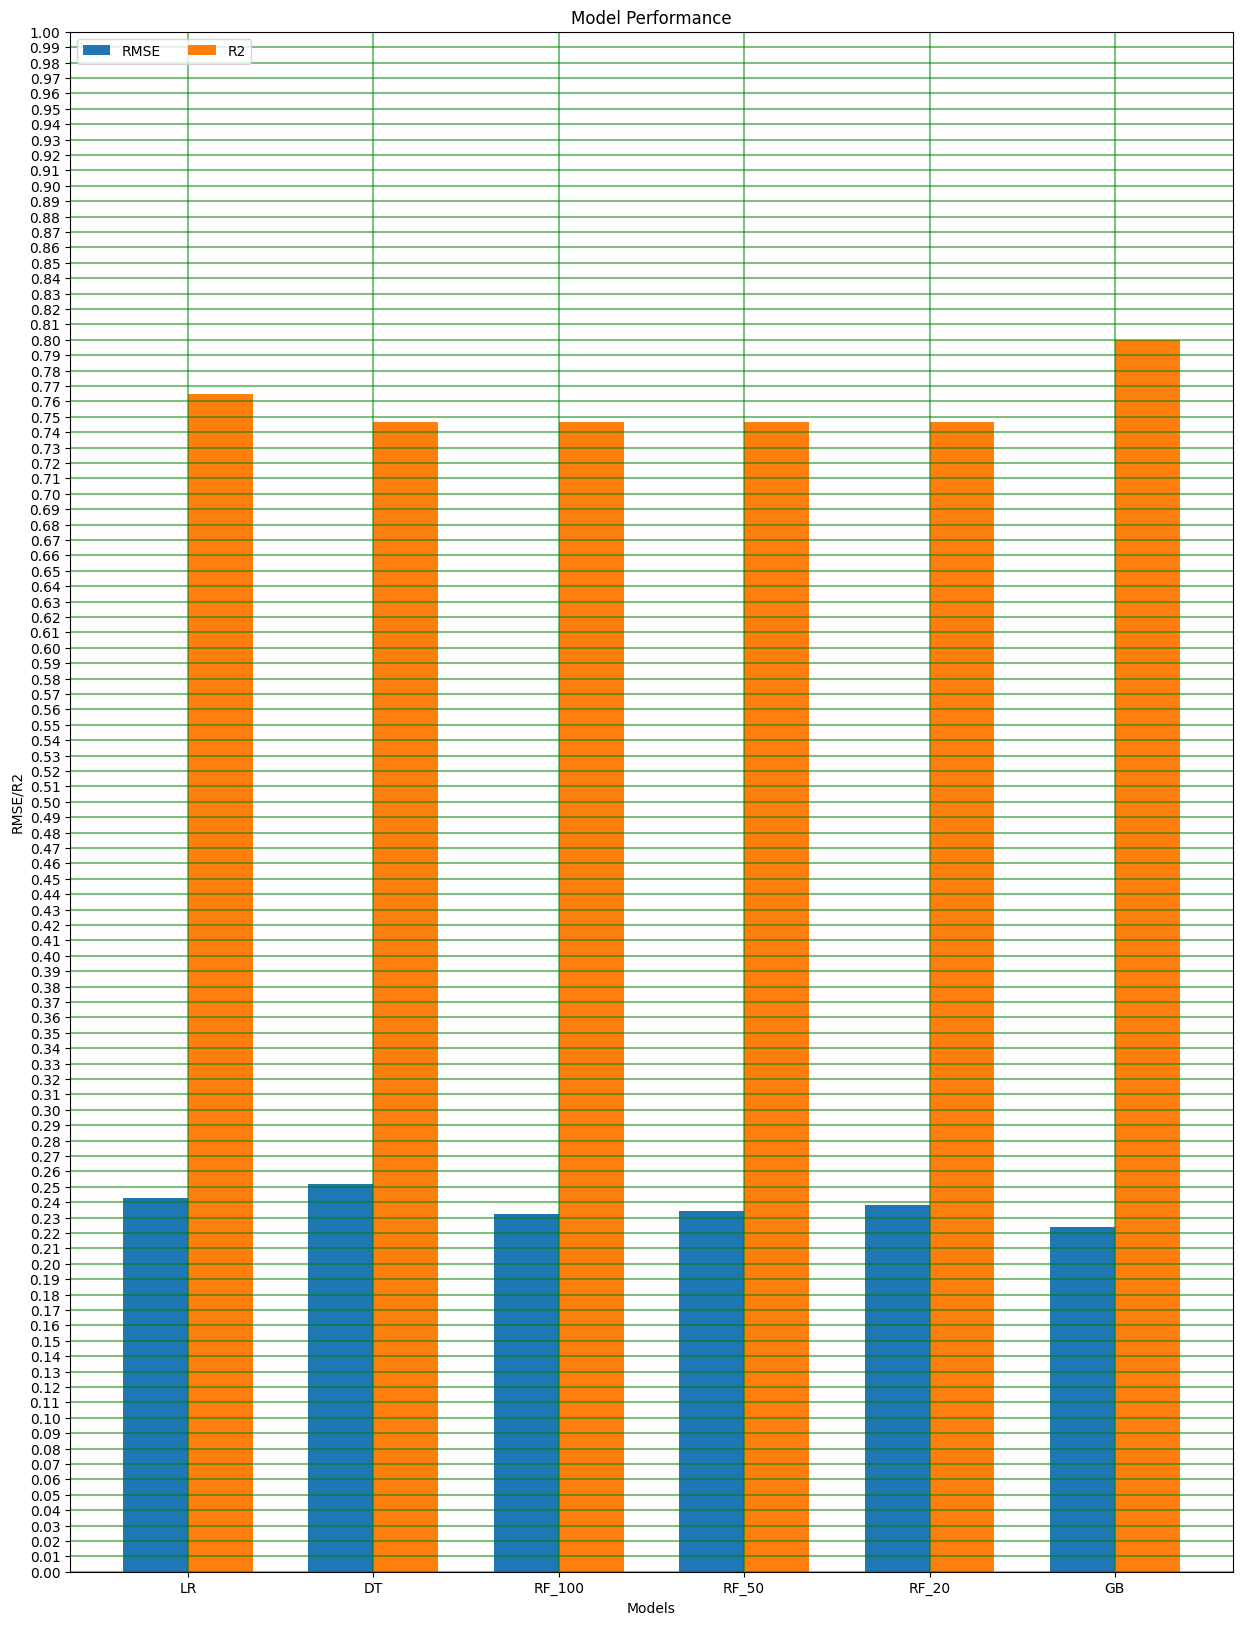

In [66]:
RMSE_Results = [lr_rmse, dt_rmse, rf_rmse_100, rf_rmse_50, rf_rmse_20, gbr_rmse]
R2_Results = [lr_r2, dt_r2, rf_r2_100, rf_r2_50, rf_r2_20, gbr_r2]
labels = ['LR', 'DT', 'RF_100', 'RF_50', 'RF_20',"GB"]

rg= np.arange(6)
width = 0.35

plt.figure(figsize=(15, 20))

plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0,1])

plt.yticks(np.arange(0, 1.1, 0.01))  # Specify the desired tick positions and labels
plt.ylim([0, 1])

plt.grid(color='green', linewidth=1.5, axis='both', alpha=0.5)
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

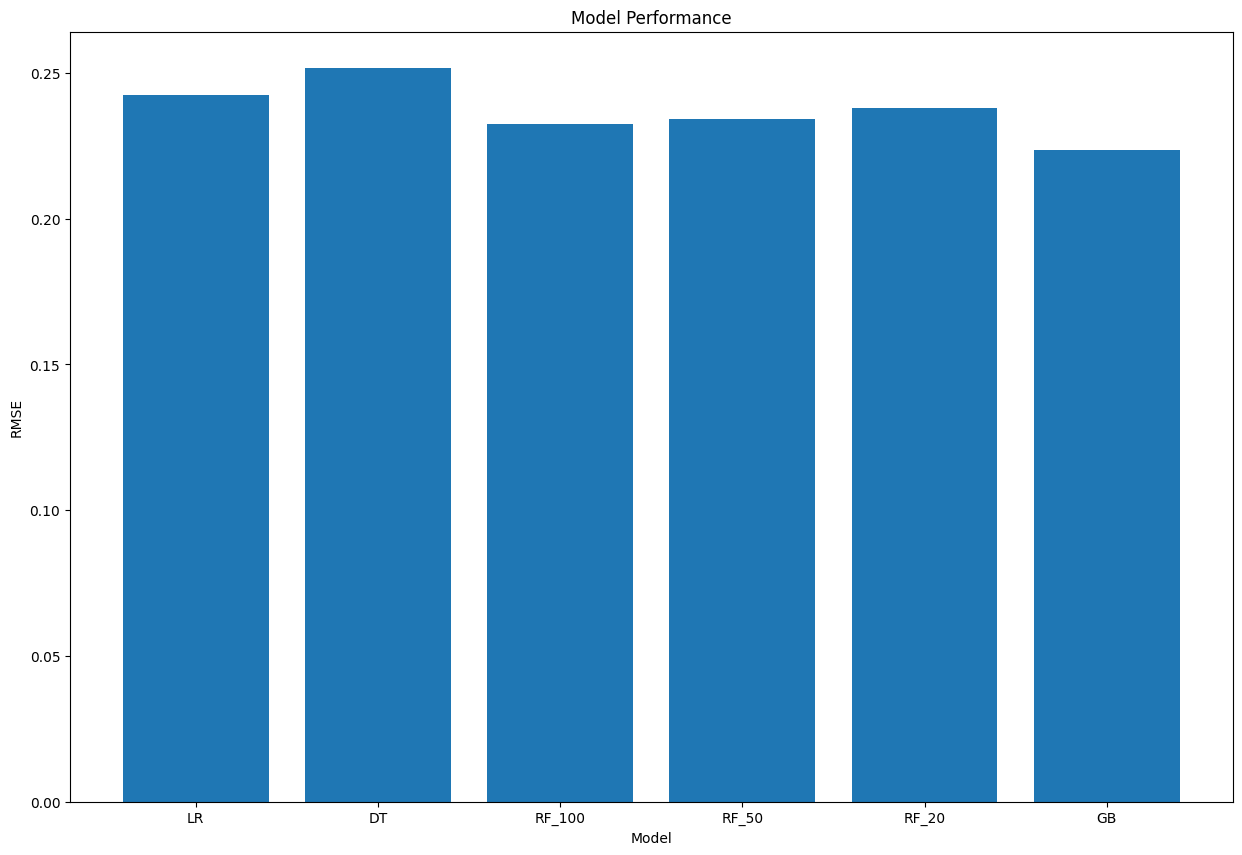

In [68]:
# make a barplot of the MSE values only
plt.figure(figsize=(15, 10))
plt.bar(labels, RMSE_Results)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Performance')
plt.show()

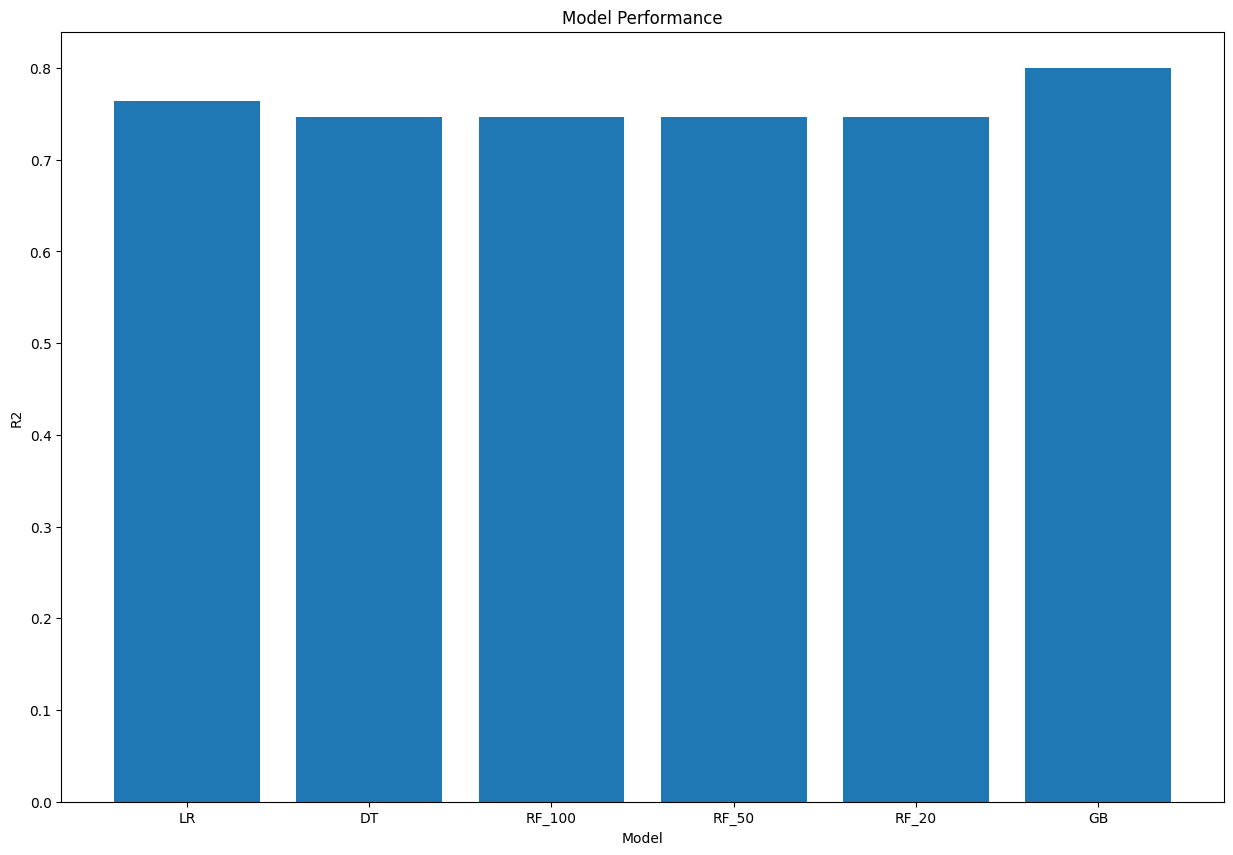

In [69]:
# make a barplot of the R2 values only
plt.figure(figsize=(15, 10))
plt.bar(labels, R2_Results)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('Model Performance')
plt.show()

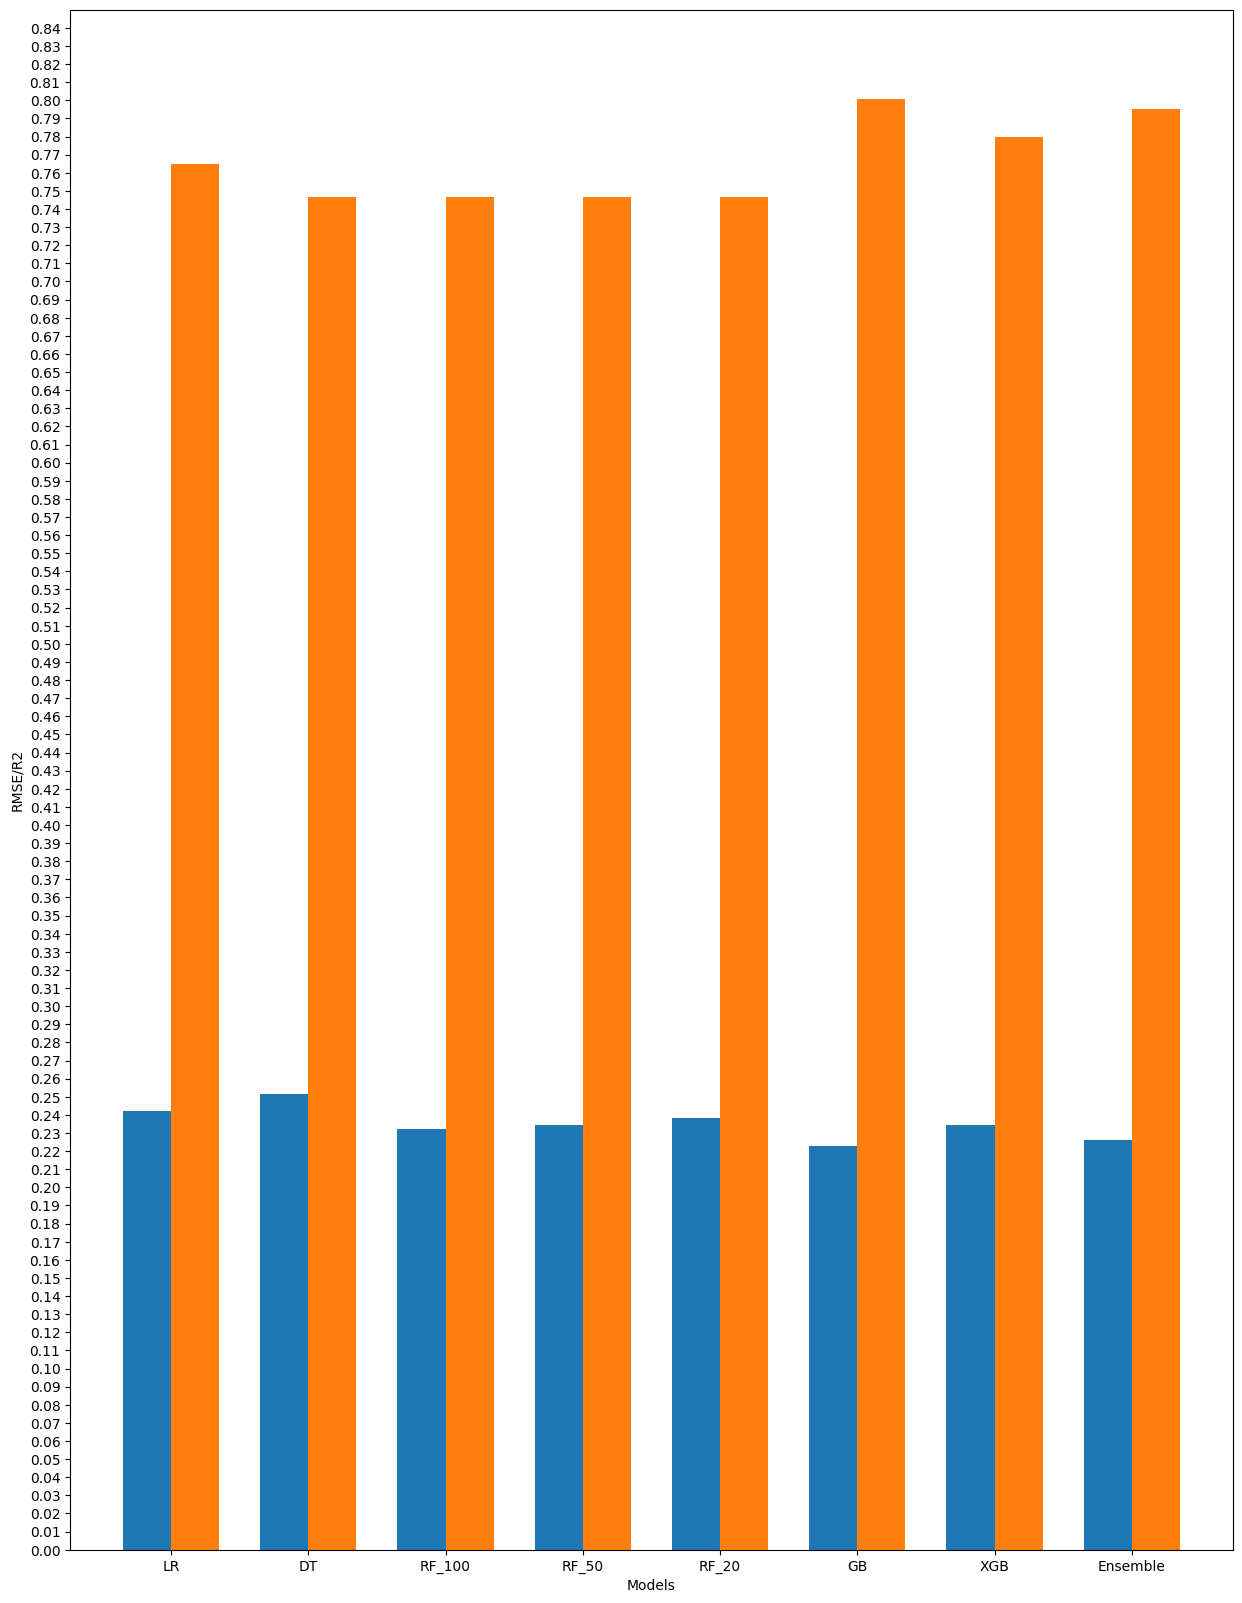

In [74]:
# include the XGBoost and ensemble models in the results
RMSE_Results2 = [lr_rmse, dt_rmse, rf_rmse_100, rf_rmse_50, rf_rmse_20, gbr_rmse, xgb_rmse, ensemble_rmse]
R2_Results2 = [lr_r2, dt_r2, rf_r2_100, rf_r2_50, rf_r2_20, gbr_r2, xgb_r2, ensemble_r2]

labels2 = ['LR', 'DT', 'RF_100', 'RF_50', 'RF_20', 'GB', 'XGB', 'Ensemble']

rg2 = np.arange(8)
width2 = 0.35

plt.figure(figsize=(15, 20))

plt.bar(rg2, RMSE_Results2, width2, label="RMSE")

plt.bar(rg2+width2, R2_Results2, width2, label='R2')

plt.xticks(rg2 + width2/2, labels2)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0,0.85])

plt.yticks(np.arange(0, 0.85, 0.01))  # Specify the desired tick positions and labels

plt.show()